In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [35]:
# Loading the dataset

data = pd.read_csv('stroke_dataset/dataset.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB




*   5 columns with cathegorical data
*   7 columns with numerical data
*   1 columns, BMI, with 201 missing values




# Preprocessing


## Data cleaning

In [5]:
# Eliminate column 'id' (irrelevant feature)
data.drop(['id'],axis=1,inplace = True)

data["gender"].value_counts()
data.loc[data["gender"]=="Other"]

#replace other in gender column with male because there are not found gender call other
data["gender"].replace("Other","Male",inplace=True)

/tmp/ipykernel_245821/3366743325.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["gender"].replace("Other","Male",inplace=True)


## Missing Values

In [6]:
# group the bmi median by 'gender', 'ever married', 'work type', and residence type'
bmi_groupby = mode_bmi = pd.DataFrame(data.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])['bmi'].median())

In [7]:
bmi_groupby

bmi
gender ever_married work_type     Residence_type       
Female No           Govt_job      Rural           26.60
                                  Urban           27.10
                    Never_worked  Rural           25.75
                                  Urban           22.90
                    Private       Rural           26.90
                                  Urban           26.15
                    Self-employed Rural           27.95
                                  Urban           29.80
                    children      Rural           18.80
                                  Urban           19.10
       Yes          Govt_job      Rural           28.40
                                  Urban           29.70
                    Private       Rural           29.35
                                  Urban           29.55
                    Self-employed Rural           29.40
                                  Urban           28.70
Male   No           Govt_job      Rural           30.00
                                  Urban           29.00
                    Never_worked  Rural           28.40
                                  Urban           21.05
                    Private       Rural           27.25
                                  Urban           26.80
                    Self-employed Rural           29.45
                                  Urban           30.90
                    children      Rural           18.95
                                  Urban           18.80
       Yes          Govt_job      Rural           29.30
                                  Urban           30.60
                    Private       Rural           30.10
                                  Urban           30.10
                    Self-employed Rural           30.70
                                  Urban           29.30

In [100]:
# fill the NaN values in BMI by matching with the categorical columns
median_bmi = data.groupby(['gender', 'ever_married', 'work_type', 'Residence_type'])

# fill the the Nan values with the most occuring body type in the make and model group
data['bmi'] = median_bmi['bmi'].transform(lambda x: x.fillna(x.median()))

In [101]:
# check for null values in the bmi column
data['bmi'].isnull().sum()

np.int64(0)

## Outliers

### Age

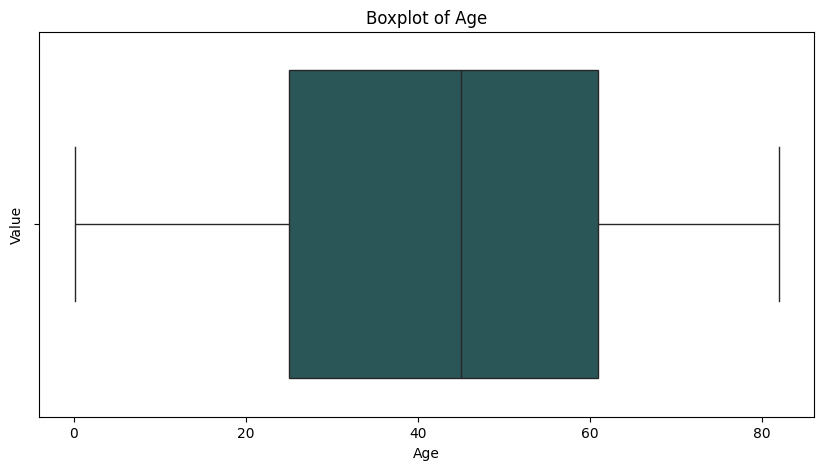

In [8]:
# Plotting a boxplot for the 'age' column
plt.figure(figsize=(10, 5))

sns.boxplot(x=data['age'], color="#245D5F")
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.ylabel("Value")

# Display the plot
plt.show()

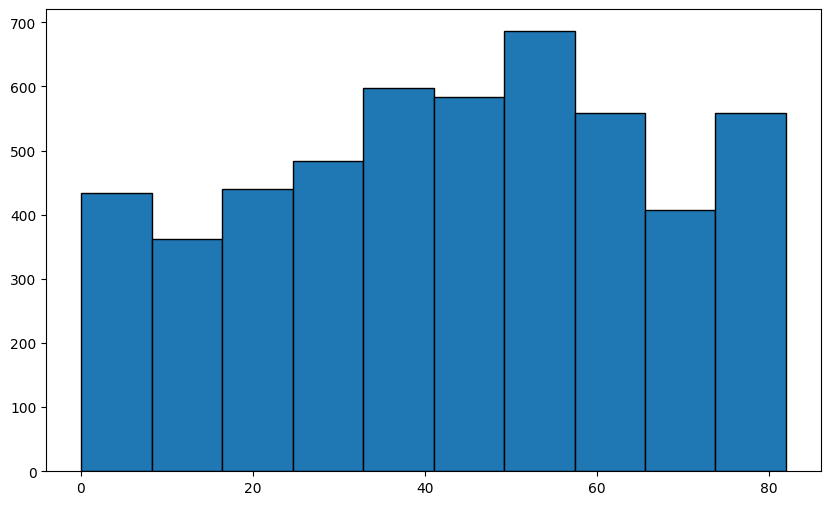

In [9]:
# histogram of Age

plt.figure(figsize=(10, 6))

plt.hist(data['age'], edgecolor='black')

plt.show()

Age column does not contain outliers

### Avg Glucose Level

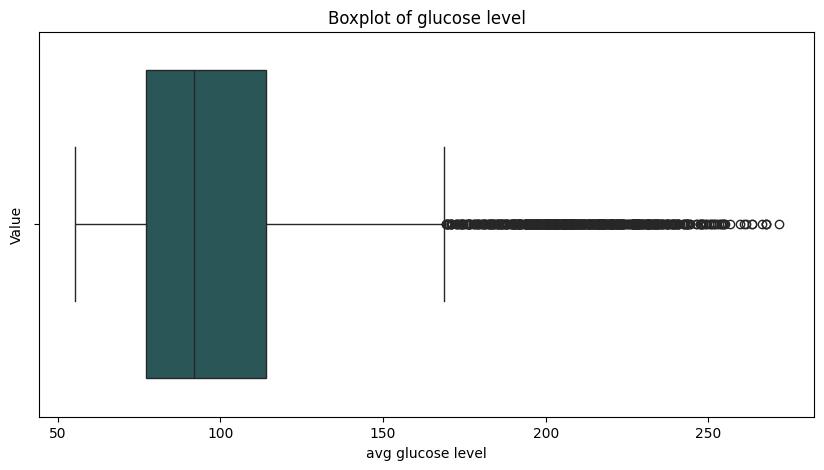

In [10]:
# Plotting a boxplot for the 'age' column
plt.figure(figsize=(10, 5))

sns.boxplot(x=data['avg_glucose_level'], color="#245D5F")
plt.title("Boxplot of glucose level")
plt.xlabel("avg glucose level")
plt.ylabel("Value")

# Display the plot
plt.show()

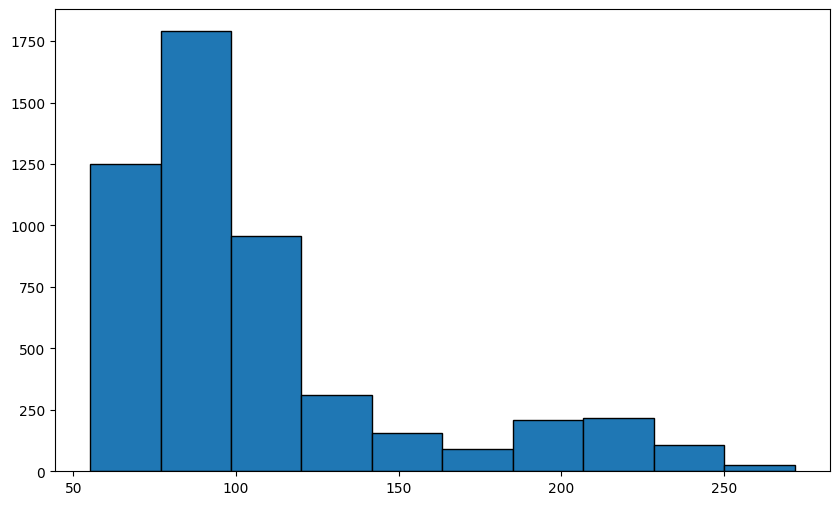

In [11]:
# histogram of glucose level

plt.figure(figsize=(10, 6))

plt.hist(data['avg_glucose_level'], edgecolor='black')

plt.show()

Glucose level refers to the concentration of glucose (a type of sugar) present in the blood.

Below are reported general ranges:

Preprandial (Before Meal) Blood Glucose Levels:

    Normal: 70 to 100 mg/dL
    Prediabetes: 100 to 125 mg/dL
    Diabetes: 126 mg/dL or higher (on more than one occasion)

Postprandial (After Meal) Blood Glucose Levels:

    Normal: Less than 140 mg/dL (measured 1-2 hours after eating)
    Prediabetes: 140 to 199 mg/dL
    Diabetes: 200 mg/dL or higher

The distribution indicates that the values are concentrated around 80 mg/dL, with the presence of outliers to the right of the distribution.
However, according to values provided by World Health Organization, values higher than 200 mg/dL are common in people suffering from diabetes.
For this reason, we will not modify outliers, as glucose levels higher than 200 mg/dL are commonly observed in individuals with diabetes and are important features for the model.

### BMI

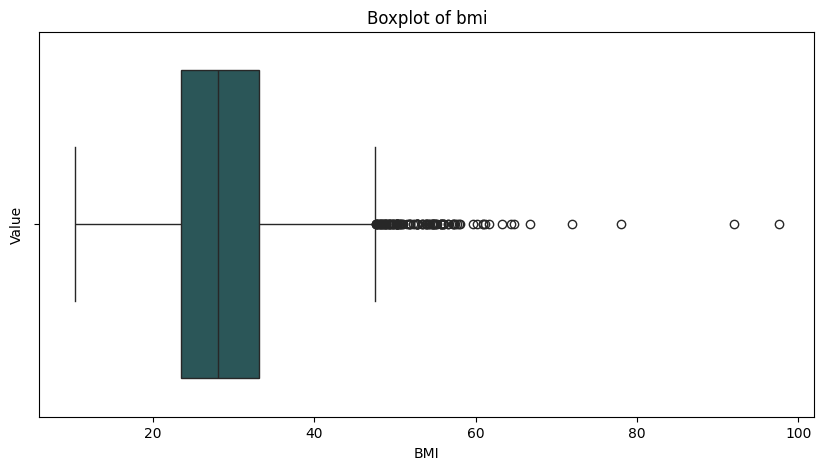

In [12]:
# Plotting a boxplot for the 'bmi' column
plt.figure(figsize=(10, 5))

sns.boxplot(x=data['bmi'], color="#245D5F")
plt.title("Boxplot of bmi")
plt.xlabel("BMI")
plt.ylabel("Value")

# Display the plot
plt.show()

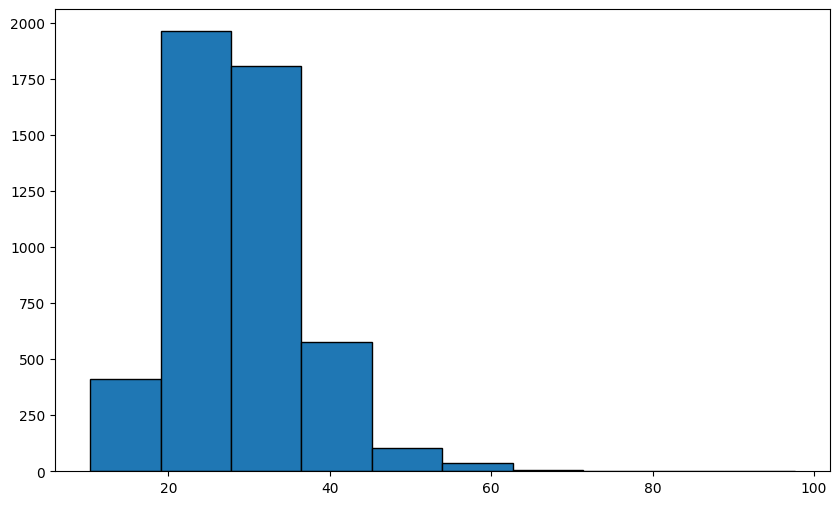

In [13]:
# histogram of BMI

plt.figure(figsize=(10, 6))

plt.hist(data['bmi'], edgecolor='black')

plt.show()

BMI (Body Mass Index) is a measure of the body fat present in human body, calculated using a person's weight and height.
Below are reported BMI values provided by World Health Organization.

BMI Values:

    Below 18.5: Underweight
    18.5-24.9 : Normal Weight
    25.0-29.9 : Pre-obesity
    30.0-34.9 : Obesity Class I
    35.0–39.9 : Obesity class II
    Above 40  : Obesity class III

According to data provided by WHO the maximum BMI possible value for a person with a medium height of 75 inches (1.9 meters) and a medium weight of 431 punds (195 kg) is 54.
This means that BMI values higher than 54 are unreliable and need to be adjusted.

In [14]:
# Detect rows where BMI is greater than 54
column = 'bmi'
threshold = 54

# select rows where the value in the column is greater than the threshold
selected_rows = data[data[column] > threshold]

# display the results
selected_rows.T

,113,258,270,333,358,430,466,544,637,662,...,4154,4188,4209,4225,4351,4407,4475,4838,4906,4952
gender,Female,Female,Female,Female,Male,Female,Female,Male,Female,Male,...,Female,Female,Male,Female,Female,Female,Female,Female,Female,Male
age,45.0,74.0,57.0,52.0,52.0,52.0,61.0,42.0,56.0,28.0,...,49.0,27.0,38.0,37.0,39.0,34.0,48.0,51.0,53.0,51.0
hypertension,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
heart_disease,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Private,Private,Private,Private,Private,Private,Govt_job,Private,Private,Self-employed
Residence_type,Rural,Urban,Rural,Urban,Urban,Urban,Rural,Rural,Rural,Urban,...,Rural,Rural,Rural,Rural,Urban,Urban,Rural,Urban,Urban,Rural
avg_glucose_level,224.1,205.84,129.54,82.24,78.4,72.79,170.05,210.48,112.43,87.43,...,125.63,57.96,56.9,77.1,87.39,70.87,221.08,107.72,70.51,211.83
bmi,56.6,54.6,60.9,54.7,64.8,54.7,60.2,71.9,54.6,55.7,...,57.2,64.4,92.0,55.9,57.9,55.7,57.2,60.9,54.1,56.6
smoking_status,never smoked,never smoked,smokes,formerly smoked,never smoked,never smoked,smokes,never smoked,never smoked,Unknown,...,Unknown,never smoked,never smoked,Unknown,never smoked,formerly smoked,never smoked,Unknown,never smoked,never smoked


There are some rows with an unreliable BMI value, greater than 54.
We are going to adjust them, as we did for missing values.

In [15]:
# define the numeric threshold
threshold = 54

# replace all 'bmi' values greater than the threshold with NaN
data.loc[data['bmi'] > threshold, 'bmi'] = np.nan

In [16]:
# check the null values of the bmi column
data['bmi'].isnull().sum()

np.int64(245)

In [17]:
# fill the missing values in the bmi column with the value 54
data['bmi'] = data['bmi'].fillna(54)

In [18]:
# check the bmi column for missing values
data['bmi'].isnull().sum()

np.int64(0)

## Feature Correlation

### Numerical Features and Target Variable

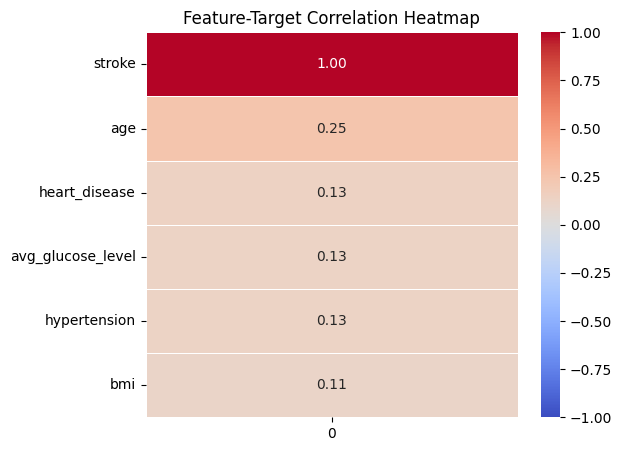

In [19]:
# Separate numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix of the numeric columns
correlation_matrix = data[numeric_columns].corr()

# Calculate the correlation of numeric columns with respect to the target 'stroke'
correlation_target = data[numeric_columns].corrwith(data['stroke']).sort_values(ascending=False)

# Plotting the correlation with target
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_target.to_frame(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Feature-Target Correlation Heatmap')
plt.show()

Understanding correlation among features can be useful to detect variables significantly related to the target variable and which features have the same behaviour and can therefore be dropped in a feature selection phase.

#### Stroke and Age

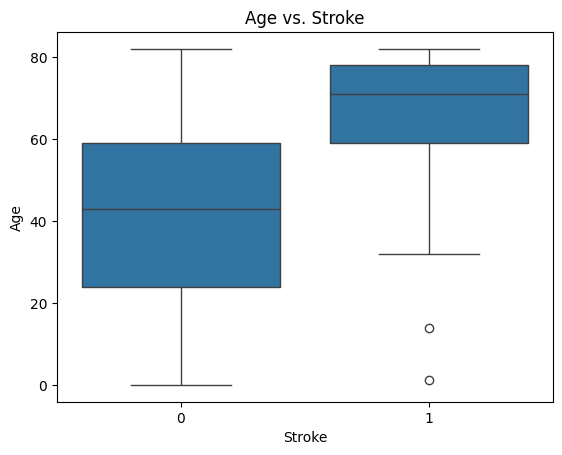

In [20]:
sns.boxplot(x='stroke', y='age', data=data)

plt.title('Age vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

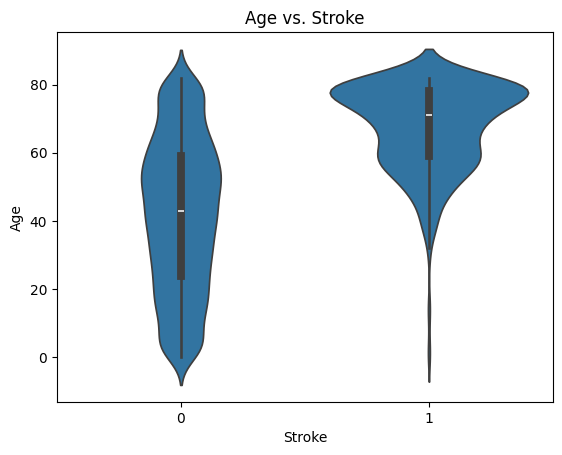

In [21]:
sns.violinplot(x='stroke', y='age', data=data)
plt.title('Age vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

The distribution of the age variable differs significantly between individuals who experienced a stroke and those who did not. While stroke-free individuals are spread across all age groups, with a slight concentration around age 40, stroke occurrences are predominantly concentrated in older individuals, peaking between 70 and 80 years. This suggests that age is a significant risk factor for stroke, with a higher likelihood of occurrence in elderly individuals.

#### Stroke and BMI

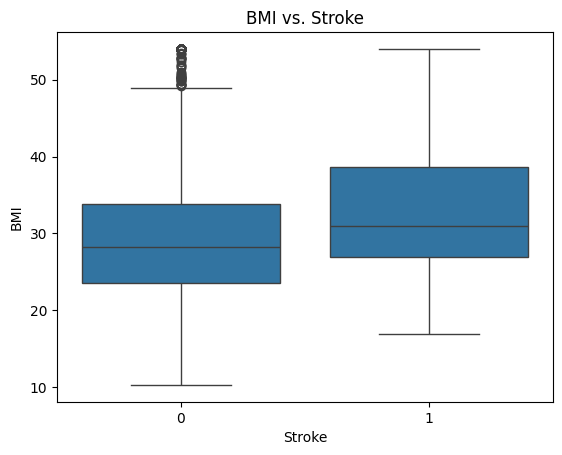

In [22]:
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title('BMI vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

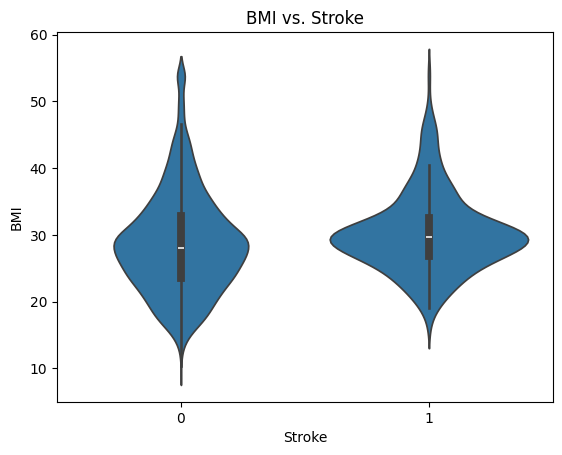

In [ ]:
sns.violinplot(x='stroke', y='bmi', data=data)
plt.title('BMI vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

The average BMI for both individuals who experienced a stroke and those who did not is approximately 30. This suggests that BMI alone does not exhibit a strong correlation with stroke occurrence. While BMI may still contribute to stroke risk in combination with other factors, its isolated impact appears to be limited based on this analysis.

#### Stroke and Glucose Level

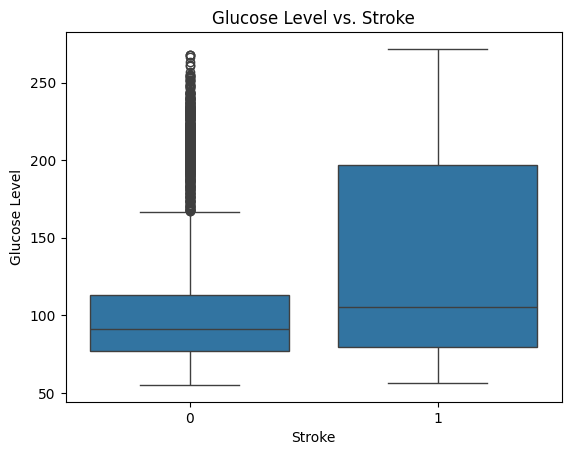

In [119]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=data)
plt.title('Glucose Level vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Glucose Level')
plt.show()

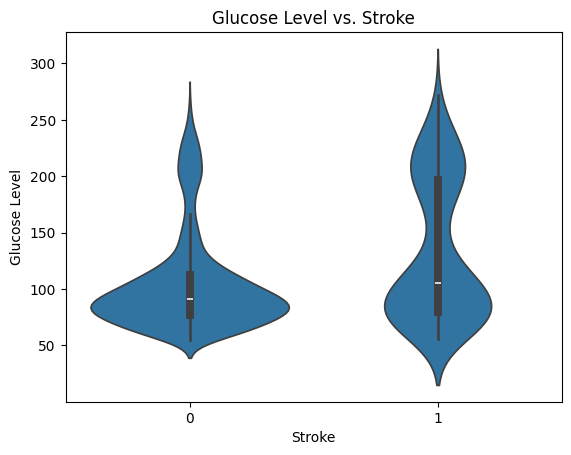

In [120]:
sns.violinplot(x='stroke', y='avg_glucose_level', data=data)

plt.title('Glucose Level vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('Glucose Level')
plt.show()

The distribution of average glucose levels shows two main concentrations: one around 80 mg/dL and another around 200 mg/dL, for both individuals who experienced a stroke and those who did not. This suggests that glucode levels alone may not be a strong distinguishing factor for stroke occurrence.   

### Categorical Features and Target Variable

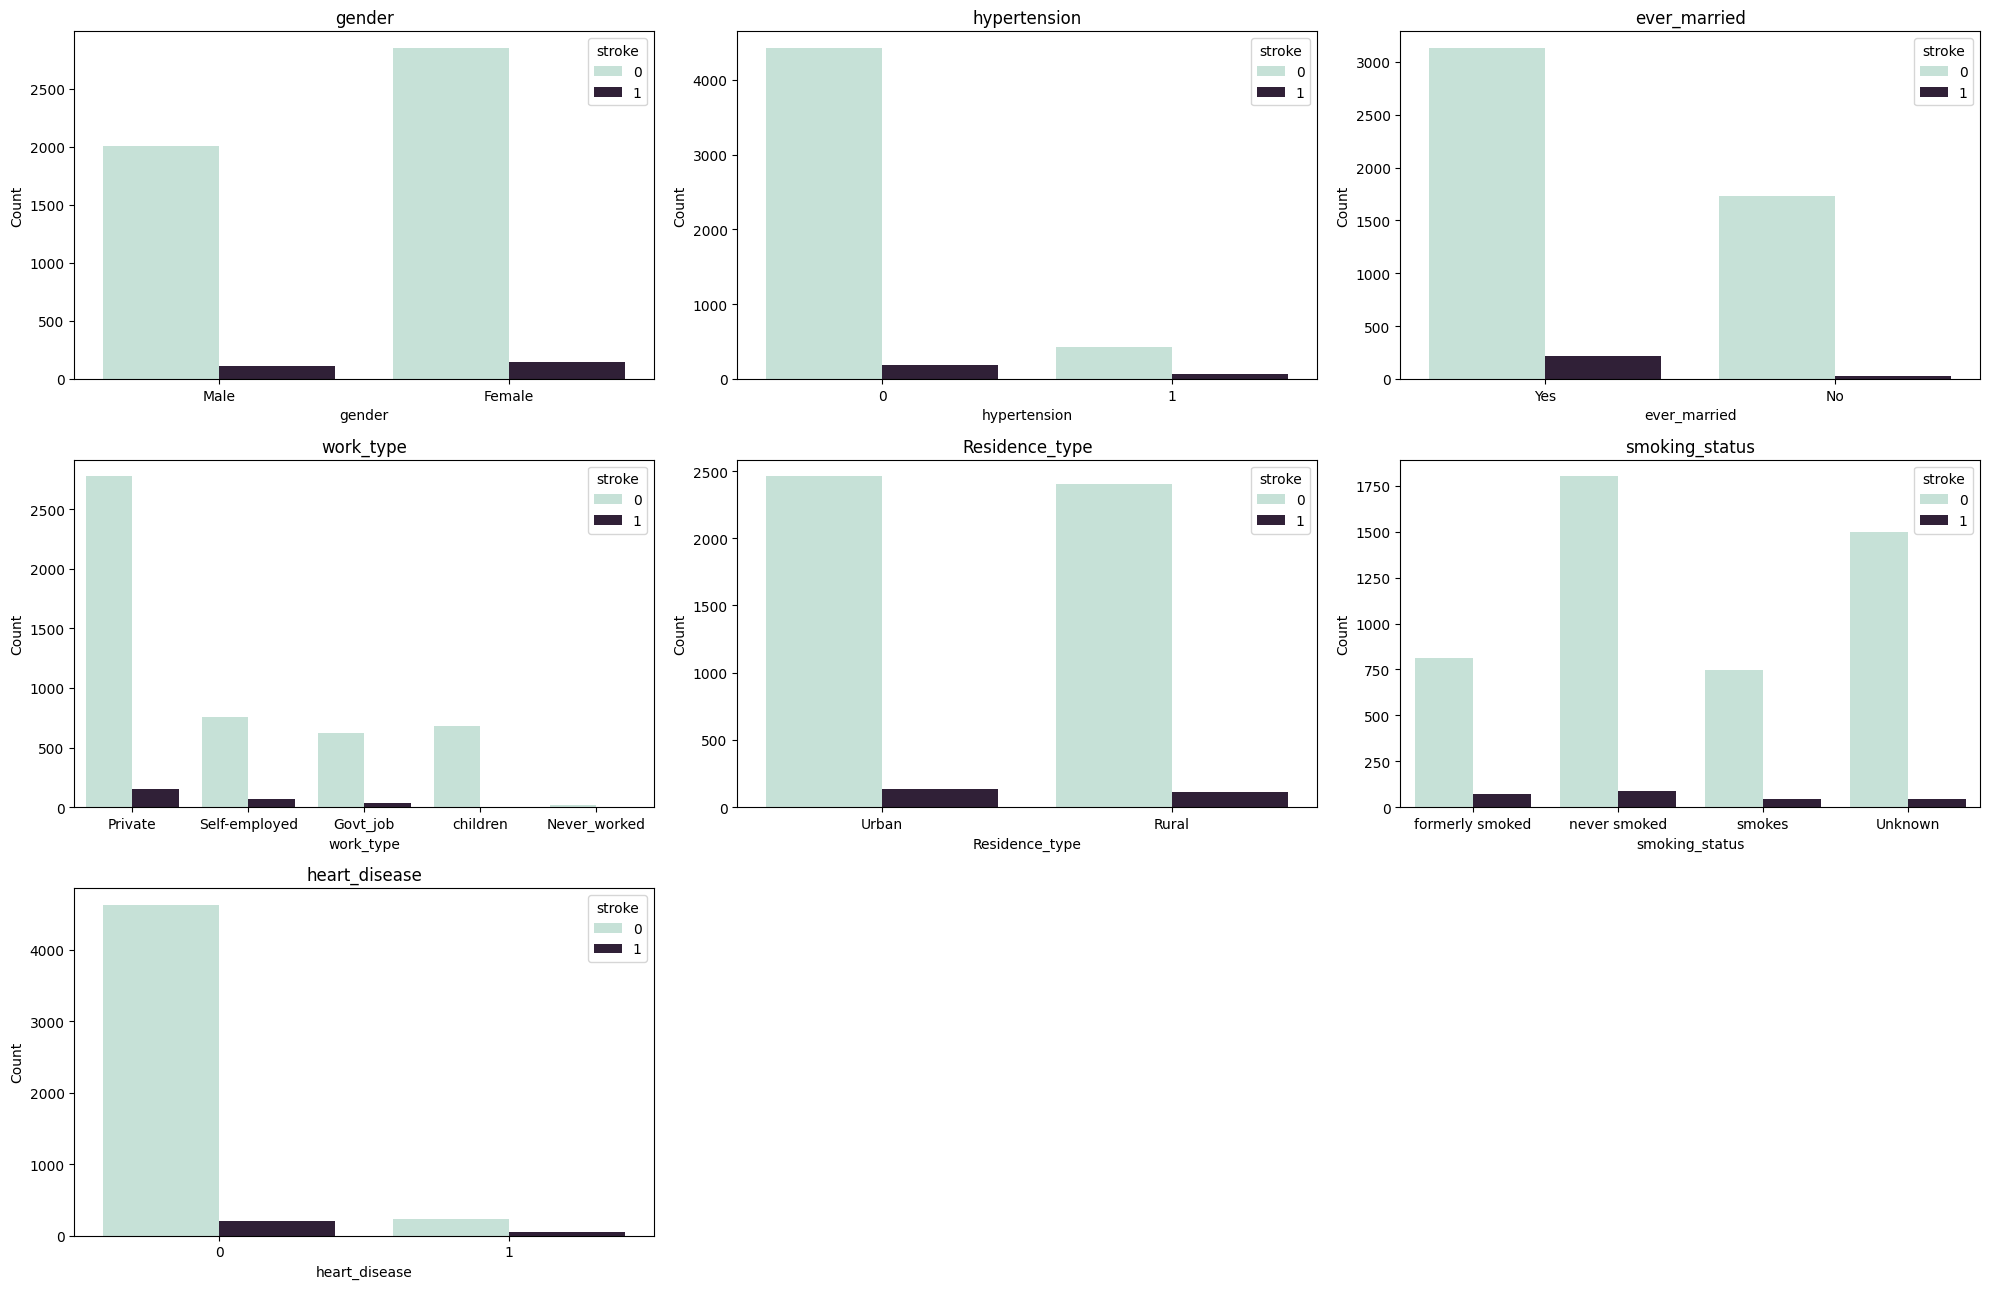

In [23]:
columns = ['gender','hypertension','ever_married','work_type','Residence_type','smoking_status','heart_disease',]

plt.figure(figsize=(20, 13))
for col in range(len(columns)):
    plt.subplot(3, 3, col + 1)
    sns.countplot(x=data[columns[col]], hue=data['stroke'], palette="ch:start=.5,rot=-.5")
    plt.title(columns[col])
    plt.xlabel(columns[col])
    plt.ylabel("Count")
plt.tight_layout()  
plt.show()


### Multicollinearity

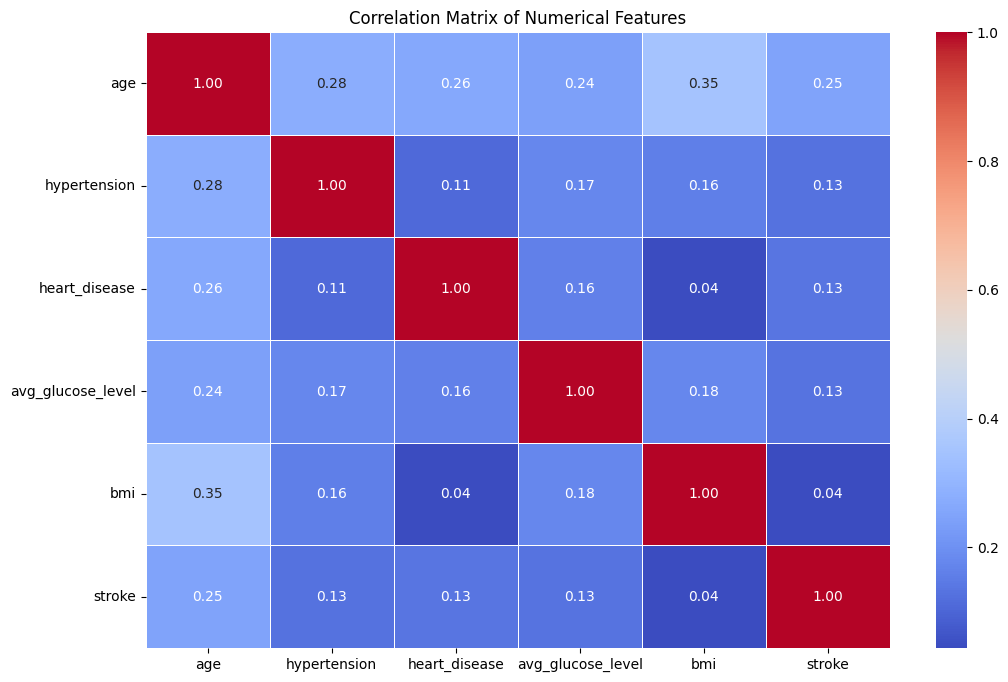

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns (excluding 'stroke' and non-numeric features)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Print or visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

It does not seem to be any strong correlation between pairs of features.
From what we can see we can suppose features are independent.

## Categorical Variables

In [24]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to only the categorical columns, drop the first dummy column for each
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True).astype(int)

data


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,54,1,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,1,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,1,0,83,54,0,0,1,0,1,0,0,1,0,1,0
5106,81,0,0,125,40,0,0,1,0,0,1,0,1,0,1,0
5107,35,0,0,82,30,0,0,1,0,0,1,0,0,0,1,0
5108,51,0,0,166,25,0,1,1,0,1,0,0,0,1,0,0


# Scale, Split, Train, Test

## Splitting

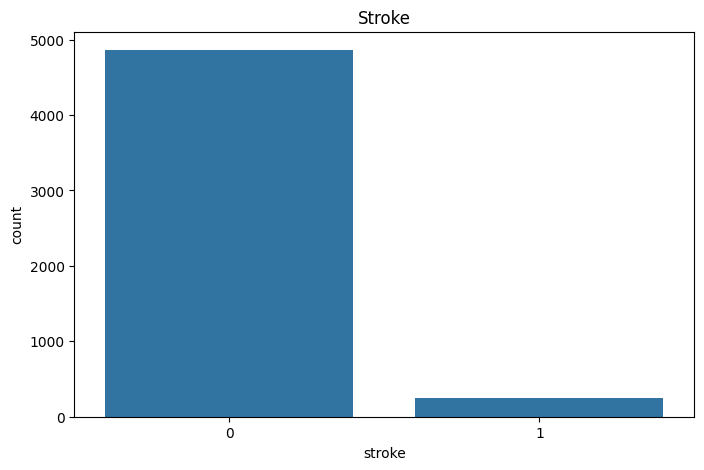

In [25]:
# Understading balance of the dataset
plt.figure(figsize=(8,5))
sns.countplot(x=data["stroke"])
plt.title("Stroke")
plt.show()

It's evident the dataset is strongly unbalanced, and this can heavily effect the model's performance.

In [26]:
X = data.drop(columns=['stroke'], axis=1)
y = data['stroke']

In [31]:
scaler = StandardScaler()

In [29]:
# split the data, since the dataset is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [32]:
# fit the scaler on the training data, then transform both train and test sets

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Resampling

In [33]:
from imblearn.over_sampling import SMOTE

# initialize SMOTE with default settings
smote = SMOTE(random_state=42)

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address the issue of class imbalance in datasets.
SMOTE generates synthetc samples of the minority class by selecting a sample, finding its k-nearest neighbors and interpolating between the original sample and one of the neighbors, to create a new sample belonging to the minority class.

In [34]:
# apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

/tmp/ipykernel_122138/1178045680.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


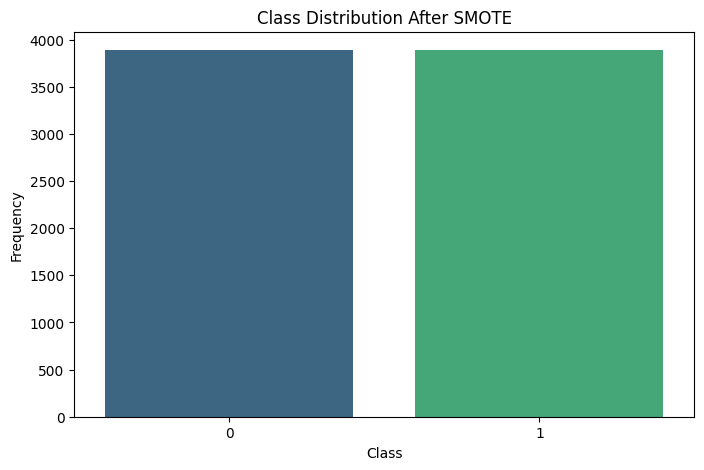

In [150]:
# Count the instances of each class in the resampled training set
class_counts = y_train_smote.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

# Add titles and labels
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [132]:
# apply SMOTE to un scaled dataframe for Random Forest Classifier
X_train_smote_unscaled, y_train_smote_unscaled = smote.fit_resample(X_train, y_train)

# Model Selection

## Evaluation Function

In [133]:
def eval_model(y_pred, y_test):

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))

    scores = {
        "accuracy" : accuracy_score(y_pred=y_pred, y_true=y_test),
        "precision": precision_score(y_pred=y_pred, y_true=y_test),
        "recall"   : recall_score(y_true=y_test, y_pred=y_pred),
        "f1"       : f1_score(y_true=y_test, y_pred=y_pred)
    }

    return pd.DataFrame([scores])

def eval_model_training_set(model, X_train, y_train):

    # Evaluate model on training set
    print("Training_Set")

    y_pred = model.predict(X_train)

    print(confusion_matrix(y_train, y_pred))

    scores = {
        "accuracy" : accuracy_score(y_pred=y_pred, y_true=y_train),
        "precision": precision_score(y_pred=y_pred, y_true=y_train),
        "recall"   : recall_score(y_true=y_train, y_pred=y_pred),
        "f1"       : f1_score(y_true=y_train, y_pred=y_pred)
    }

    return pd.DataFrame([scores])

## Random Forest

### Random Forest (without SMOTE)

In [134]:
# Initilize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')

# Fit the model to the training data, without resampling
rf_model.fit(X_train, y_train)

# Prediction on test set
y_pred= rf_model.predict(X_test)

# Evaluate model on the test set
eval_model(y_pred, y_test)

Test_Set
[[931  41]
 [ 39  11]]


,accuracy,precision,recall,f1
0,0.921722,0.211538,0.22,0.215686


In [135]:
# Evaluate the model on training set
eval_model_training_set(rf_model, X_train, y_train)

Training_Set
[[3758  131]
 [   9  190]]


,accuracy,precision,recall,f1
0,0.965753,0.5919,0.954774,0.730769


The Random Forest model demonstrates very good performance on the training set but performs poorly on the test set. This discrepancy is likely due to severe overfitting, which can be attributed to the class imbalance in the dataset.

### Random Forest (with SMOTE)

In [136]:
# Initialize model
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to resampled training data
rf_model_smote.fit(X_train_smote_unscaled, y_train_smote_unscaled)

# Predictions on test set
y_pred = rf_model_smote.predict(X_test)

# Evaluation of test set
eval_model(y_pred, y_test)

Test_Set
[[890  82]
 [ 41   9]]


,accuracy,precision,recall,f1
0,0.879648,0.098901,0.18,0.12766


In [137]:
# Evaluation on training set
eval_model_training_set(rf_model_smote, X_train, y_train)

Training_Set
[[3602  287]
 [  36  163]]


,accuracy,precision,recall,f1
0,0.920988,0.362222,0.819095,0.502311


Despite resampling, the model continues to suffer from overfitting, showing poor performance on the test set. To address this, we will attempt parameter tuning to improve generalization and reduce overfitting.

### Random Forest Tuning (without SMOTE)

In [155]:
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier with balanced class weight
rf_tune = RandomForestClassifier(random_state=42, class_weight='balanced')

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6]
}

# Set up GridSearchCV
grid_rf = GridSearchCV(estimator=rf_tune, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
grid_rf.fit(X_train, y_train)

# Show best parameters
print(f"Best Parameters: {grid_rf.best_params_}")

# Evaluate on the test set
y_pred = grid_rf.predict(X_test)  

# Evaluate the model performance
eval_model(y_pred, y_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 50}
Test_Set
[[749 223]
 [ 12  38]]


,accuracy,precision,recall,f1
0,0.770059,0.145594,0.76,0.244373


### Random Forest Tuning (with SMOTE)

In [ ]:
rf_tune = RandomForestClassifier(random_state=42, class_weight='balanced')

# parameter grid
param_grid_smote = { 'n_estimators': [150,200, 250],
'max_depth': [4, 5,6],
'min_samples_split': [2,3,4]
}

grid_rf_smote = GridSearchCV(estimator=rf_tune, param_grid=param_grid_smote, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# fit the model
grid_rf_smote.fit(X_train_smote_unscaled, y_train_smote_unscaled)

# show best parameters
print(f"Best Parameters: {grid_rf_smote.best_params_}")

y_pred = grid_rf_smote.predict(X_test)

eval_model(y_pred, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 150}
Test_Set
[[804 168]
 [ 28  22]]


,accuracy,precision,recall,f1
0,0.808219,0.115789,0.44,0.183333


There's no much difference between performance on original dataset and on resampled dataset.

We can see that using a high number of estimators combined with a low depth it is possible to reduce the risk of overfitting, making the model able to generalize on unseen data.

## K-Nearest Neighbors

### KNN (without SMOTE)

In [ ]:
# Initialize model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data, without resampling
knn.fit(X_train_scaled, y_train)

#  Predictions
y_pred= knn.predict(X_test_scaled)

# Print evaluation metrics on test set
eval_model(y_pred, y_test)

Test_Set
[[970   2]
 [ 49   1]]


,accuracy,precision,recall,f1
0,0.950098,0.333333,0.02,0.037736


In [68]:
# Evaluation on training set
eval_model_training_set(knn, X_train_scaled, y_train)

Training_Set
[[3881    8]
 [ 191    8]]


,accuracy,precision,recall,f1
0,0.951321,0.5,0.040201,0.074419


### KNN (with SMOTE)

In [ ]:
# Initialize model 
knn_smote = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data 
knn_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = knn_smote.predict(X_test_scaled)

# Print evaluation metrics
eval_model(y_pred, y_test)

Test_Set
[[812 160]
 [ 31  19]]


,accuracy,precision,recall,f1
0,0.813112,0.106145,0.38,0.165939


### KNN Tuning (without SMOTE)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
grid_knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Perform GridSearchCV
grid_search = GridSearchCV(grid_knn, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_scaled)

eval_model(y_pred, y_test)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test_Set
[[957  15]
 [ 46   4]]


,accuracy,precision,recall,f1
0,0.940313,0.210526,0.08,0.115942


In [69]:
# Evaluation on training set
eval_model_training_set(grid_search.best_estimator_, X_train_scaled, y_train)

Training_Set
[[2796 1093]
 [  34  165]]


,accuracy,precision,recall,f1
0,0.724315,0.131161,0.829146,0.226493


### KNN Tuning (with SMOTE)

In [70]:
# Create a KNN classifier
grid_knn_smote = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 25, 35],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Perform GridSearchCV
grid_search = GridSearchCV(grid_knn_smote, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test_scaled)

eval_model(y_pred, y_test)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Test_Set
[[868 104]
 [ 40  10]]


,accuracy,precision,recall,f1
0,0.8591,0.087719,0.2,0.121951


In [71]:
# Evaluation on training set
eval_model_training_set(grid_search.best_estimator_, X_train_scaled, y_train)

Training_Set
[[3889    0]
 [   0  199]]


,accuracy,precision,recall,f1
0,1.0,1.0,1.0,1.0


Thanks to data resampling and hyperparameters tuning KNN achieves perfect performance on the training set. However it shows poor performance on test set, demonstrating itself unable to generalize well on new data.

## SVM

### SVM (without SMOTE)

In [ ]:
from sklearn.svm import SVC

# Initialize model
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True, class_weight='balanced')

# Fit model to training set (without resampling)
svm_model.fit(X_train_scaled, y_train)

# Prediction on test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluation on test set
eval_model(y_pred, y_test)

Test_Set
[[705 267]
 [  9  41]]


,accuracy,precision,recall,f1
0,0.729941,0.133117,0.82,0.22905


In [58]:
# Evaluation on training set
eval_model_training_set(svm_model, X_train_scaled, y_train)

Training_Set
[[2796 1093]
 [  34  165]]


,accuracy,precision,recall,f1
0,0.724315,0.131161,0.829146,0.226493


The SVM model achieves a high recall score, indicating strong ability in identifying samples from the minority class. However, it struggles with precision when classifying the majority class, resulting in a lower precision score. Analyzing performance on the training set does not indicate overfitting suggesting that this issue is likely due to the dataset's class imbalance. This challenge may be mitigated through resampling techniques or parameter tuning to improve the model's balance between precision and recall.

### SVM (with SMOTE)

In [72]:
# Initialize the model
svm_model_smote = SVC(kernel='linear', C=1.0, random_state=42, probability=True, class_weight='balanced')

# Train the model on resampled training set
svm_model_smote.fit(X_train_smote, y_train_smote)

# Prediction on test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluation on test set
eval_model(y_pred, y_test)

Test_Set
[[705 267]
 [  9  41]]


,accuracy,precision,recall,f1
0,0.729941,0.133117,0.82,0.22905


In [73]:
# Evaluation on training set
eval_model_training_set(svm_model_smote, X_train_scaled, y_train)

Training_Set
[[2812 1077]
 [  35  164]]


,accuracy,precision,recall,f1
0,0.727984,0.132151,0.824121,0.227778


### SVM Tuning (without SMOTE)

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],      # Regularization parameter
    'kernel': ['linear'],  # Kernel types
    # 'gamma': [1, 0.1, 0.01, 0.001]  # Kernel coefficient for 'rbf'
}

# Create an SVM classifier
svc = SVC(class_weight='balanced', probability=True)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring = 'f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set using the best parameters
svc_best_model = grid_search.best_estimator_
y_pred = svc_best_model.predict(X_test_scaled)

# Evaluation on test set
eval_model(y_pred, y_test)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Test_Set
[[705 267]
 [  9  41]]


,accuracy,precision,recall,f1
0,0.729941,0.133117,0.82,0.22905


In [75]:
# Evaluation on training set
eval_model_training_set(svc_best_model, X_train_scaled, y_train)

Training_Set
[[2796 1093]
 [  34  165]]


,accuracy,precision,recall,f1
0,0.724315,0.131161,0.829146,0.226493


### SVM Tuning (with SMOTE)

In [76]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],      # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': [1, 0.1, 0.01, 0.001]  # Kernel coefficient for 'rbf'
}

# Create an SVM classifier
svc = SVC(class_weight='balanced', probability=True)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring = 'f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set using the best parameters
svc_best_model = grid_search.best_estimator_
y_pred = svc_best_model.predict(X_test_scaled)

# Evaluation on test set
eval_model(y_pred, y_test)

Best Parameters: {'C': 0.001, 'kernel': 'linear'}
Test_Set
[[663 309]
 [ 10  40]]


,accuracy,precision,recall,f1
0,0.687867,0.114613,0.8,0.200501


In [77]:
# Evaluation on training set
eval_model_training_set(svc_best_model, X_train_scaled, y_train)

Training_Set
[[2633 1256]
 [  24  175]]


,accuracy,precision,recall,f1
0,0.686888,0.122292,0.879397,0.214724


Despite resampling the training set and tuning hyperparameters, the SVM model still struggles to correctly classify samples from the majority class. This suggests that the underlying class imbalance remains a challenge, and resampling alone may not be sufficient to improve performance. The issue could stem from overlapping feature distributions between classes, limitation of the current feature set, or the inherent characteristics of SVM in handling imbalanced data.

## Naive Bayes

### Naive Bayes (without SMOTE)

In [64]:
# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_scaled)

# Evaluation on test set
eval_model(y_pred, y_test)

Test_Set
[[275 697]
 [  1  49]]


,accuracy,precision,recall,f1
0,0.317025,0.065684,0.98,0.123116


In [66]:
# Evaluation on training set
eval_model_training_set(nb_model, X_train_scaled, y_train)

Training_Set
[[1042 2847]
 [   1  198]]


,accuracy,precision,recall,f1
0,0.303327,0.065025,0.994975,0.122072


The Naive Bayes classifier achieves an excellent recall score, successfully identifying all samples from the minority class. However, similar to SVM models, it struggles to correctly classify samples from the majority class, leading to an imbalance in precision

### Naive Bayes Tuning (with SMOTE)

In [78]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
nb_model_smote = GaussianNB()

# Train the model
nb_model_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = nb_model_smote.predict(X_test_scaled)

# Get predicted probabilities for all test samples
probs = nb_model_smote.predict_proba(X_test_scaled)

# Extract probabilities for the positive class (class 1)
positive_class_probs = probs[:, 1]

# Update y_pred: set to 1 only if probability >= 0.99, otherwise set to 0
y_pred[positive_class_probs < 0.998] = 0

# Evaluation on test set
eval_model(y_pred, y_test)


Test_Set
[[430 542]
 [  2  48]]


,accuracy,precision,recall,f1
0,0.46771,0.081356,0.96,0.15


In [79]:
# Evaluation on training set
eval_model_training_set(nb_model_smote, X_train_scaled, y_train)

Training_Set
[[1122 2767]
 [   1  198]]


,accuracy,precision,recall,f1
0,0.322896,0.066779,0.994975,0.125158


Despite resampling of the training set, Naive Bayes classifier still struggles to identify samples coming from the majority class

## Model Comparison

In [81]:
data = [
    ['Random Forest', 0.14, 0.76, 0.24],
    ['Random Forest (SMOTE)', 0.11, 0.44, 0.18],
    ['KNN', 0.21, 0.08, 0.11],
    ['KNN (SMOTE)', 0.08, 0.2, 0.12],
    ['SVM', 0.13, 0.82, 0.22],
    ['SVM (SMOTE)', 0.11, 0.8, 0.2],
    ['Naive Bayes', 0.08, 0.98, 0.12],
    ['Naive Bayes (SMOTE)', 0.08, 0.96, 0.15]
]

# Define column names
columns = ['Model', 'Precision', 'Recall', 'F1-Score']

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
df

,Model,Precision,Recall,F1-Score
0,Random Forest,0.14,0.76,0.24
1,Random Forest (SMOTE),0.11,0.44,0.18
2,KNN,0.21,0.08,0.11
3,KNN (SMOTE),0.08,0.20,0.12
4,SVM,0.13,0.82,0.22
5,SVM (SMOTE),0.11,0.80,0.20
6,Naive Bayes,0.08,0.98,0.12
7,Naive Bayes (SMOTE),0.08,0.96,0.15


Model comparison reveals that none of the models perform exceptionally well on the test set in distinguishing between the two classes. 
Given that the primary objective of this project is to identify individuals at risk of stroke, models with a high recall score are preferred. These models exel at identifying those who are at risk, even if it means missclassifying some healthy indiviuals as 'at risk'.
To address this challenge, ensembling techniques were exploited to determine if they could mitigate the imbalance in performance.

## Model Ensemble

In [89]:
from sklearn.utils import resample

def bagging_ensemble(X_train_scaled, y_train, X_test_scaled, models, n_estimators=3):

    n_models = len(models)
    all_predictions = np.zeros((n_estimators, len(X_test_scaled), n_models))

    for i in range(n_estimators):
        X_bootstrap, y_bootstrap = resample(X_train_scaled, y_train, n_samples=len(X_train_scaled), random_state=i)

        for j, model in enumerate(models):
            # Retrain the model on the bootstrap sample
            model_clone = type(model)().set_params(**model.get_params()) # Create a clone to avoid modifying original
            model_clone.fit(X_bootstrap, y_bootstrap)
            all_predictions[i, :, j] = model_clone.predict(X_test_scaled) # Predict on the test set

    # Majority voting (or averaging for regression)
    final_predictions = np.mean(all_predictions, axis=(0,2)) > 0.5  # For binary classification

    return final_predictions




# List of trained models
models = [nb_model, grid_rf_smote.best_estimator_, svc_best_model]

# Perform bagging ensemble
ensemble_predictions = bagging_ensemble(X_train_scaled, y_train, X_test_scaled, models, n_estimators=3)

# Evaluate the ensemble model
eval_model(ensemble_predictions, y_test)

Test_Set
[[784 188]
 [ 14  36]]


,accuracy,precision,recall,f1
0,0.802348,0.160714,0.72,0.262774


In [159]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier

# Create the base models
base_model_3 = svc_best_model
base_model_2 = grid_rf_smote.best_estimator_
base_model_1 = nb_model_smote

# Create the meta-model
meta_model = nb_model_smote

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('nb', base_model_1), ('rf', base_model_2), ('svm', base_model_3)],  
    final_estimator=meta_model,  
    cv=5 
)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test_scaled)

# Evaluate the model
eval_model(y_pred, y_test)

Test_Set
[[845 127]
 [ 13  37]]


,accuracy,precision,recall,f1
0,0.863014,0.22561,0.74,0.345794


## Conclusion